<a href="https://colab.research.google.com/github/simulate111/Data-Science_2024/blob/main/Textual_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Textual Data Analysis with NLTK and SpaCy

In [10]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import zipfile

# Unzipping the file
with zipfile.ZipFile('spacenews.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()


#Reading the CSV into a dataframe

#The dataset

In [ ]:
#https://www.kaggle.com/datasets/patrickfleith/space-news-dataset/data

In [11]:
import io
import pandas as pd
df_spacenews = pd.read_csv('spacenews.csv')
nrow, ncol = df_spacenews.shape
print(f'There are {nrow} rows and {ncol} columns.')
df_spacenews.head(20)

There are 20716 rows and 6 columns.


,title,url,content,author,date,postexcerpt
0,Electron launches first NASA PREFIRE Earth sci...,https://spacenews.com/electron-launches-first-...,LOS ANGELES — Rocket Lab launched the first of...,Jeff Foust,"May 25, 2024",NaN
1,Space Development Agency to procure dedicated ...,https://spacenews.com/space-development-agency...,WASHINGTON — T he Space Development Agency (S...,Sandra Erwin,"May 25, 2024",NaN
2,Bringing generative artificial intelligence to...,https://spacenews.com/bringing-generative-arti...,"TAMPA, Fla. — Amazon Web Services is busy posi...",Jason Rainbow,"May 24, 2024",NaN
3,SpaceX sets early June launch of next Starship...,https://spacenews.com/spacex-sets-early-june-l...,LOS ANGELES — SpaceX has set a June 5 launch d...,Jeff Foust,"May 24, 2024",NaN
4,NASA and Boeing moving ahead with Starliner te...,https://spacenews.com/nasa-and-boeing-moving-a...,LOS ANGELES — NASA and Boeing are preparing fo...,Jeff Foust,"May 24, 2024",NaN
5,EU and ESA seek increased competitiveness of E...,https://spacenews.com/eu-and-esa-seek-increase...,WASHINGTON — European officials adopted a reso...,Jeff Foust,"May 24, 2024",NaN
6,NASA defends Artemis cost and schedule amid pl...,https://spacenews.com/nasa-defends-artemis-cos...,WASHINGTON — NASA Administrator Bill Nelson de...,Jeff Foust,"May 23, 2024",NaN
7,U.S. seeks bids from satellite manufacturers f...,https://spacenews.com/u-s-seeks-bids-from-sate...,WASHINGTON — The U.S. Space Force is solicitin...,Sandra Erwin,"May 23, 2024",NaN
8,Intelsat extends satellite life extension cont...,https://spacenews.com/intelsat-extends-satelli...,"TAMPA, Fla. — Intelsat has signed a deal to us...",Jason Rainbow,"May 23, 2024",NaN
9,Stanford center focuses on spacecraft autonomy,https://spacenews.com/stanford-center-focuses-...,"PALO ALTO, Calif. – The Center for AEroSpace A...",Debra Werner,"May 23, 2024",NaN


#Describing the data

In [12]:
#check the first title
df_spacenews['title'].iloc[0]

'Electron launches first NASA PREFIRE Earth science cubesat'

In [13]:
_#Checking the dataset
df_spacenews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20716 entries, 0 to 20715
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        20716 non-null  object
 1   url          20716 non-null  object
 2   content      20551 non-null  object
 3   author       20716 non-null  object
 4   date         20716 non-null  object
 5   postexcerpt  18196 non-null  object
dtypes: object(6)
memory usage: 971.2+ KB


In [14]:
# Checking for NaN values in the entire dataframe
nan_counts = df_spacenews.isna().sum()

# Displaying the count of NaN values for each column
print(nan_counts)


title             0
url               0
content         165
author            0
date              0
postexcerpt    2520
dtype: int64


#Retrieving the missing data with Beautiful Soup

In [15]:
#get index of nan values in content column
nan_indices = df_spacenews[df_spacenews['content'].isna()].index
print(nan_indices)

Index([ 4322,  7025,  7052,  7569,  7871,  7995,  8081,  8477,  8973,  9198,
       ...
       20622, 20627, 20640, 20641, 20642, 20644, 20652, 20678, 20690, 20701],
      dtype='int64', length=165)


In [16]:
#Getting the contents of the missing articles using requests and beautiful soup

import requests
from bs4 import BeautifulSoup

def get_article_content(url):
#fetch the article content from a given URL.
  try:
    response = requests.get(url)
    response.raise_for_status()  # raise an exception for bad status codes
    soup = BeautifulSoup(response.content, 'html.parser')
    article_content = soup.find('article')  # adapt based on the website structure
    if article_content:
      return article_content.get_text()
    else:
      return None
  except requests.exceptions.RequestException as e:
    print(f"Error fetching content from {url}: {e}")
    return None


for index in nan_indices:
  url = df_spacenews.loc[index, 'url']
  if pd.notna(url):
    content = get_article_content(url)
    if content:
      df_spacenews.loc[index, 'content'] = content
      print(f"Content fetched for index {index}")
    else:
      print(f"No content found for index {index} with URL {url}")


Content fetched for index 4322
Error fetching content from https://spacenews.com/coronavirus-special-coverage/: 404 Client Error: Not Found for url: https://spacenews.com/section/coronavirus/
No content found for index 7025 with URL https://spacenews.com/coronavirus-special-coverage/
Content fetched for index 7052
Content fetched for index 7569
No content found for index 7871 with URL https://spacenews.com/nominations-now-open-for-the-2019-spacenews-awards-for-excellence-innovation/
Content fetched for index 7995
Content fetched for index 8081
Content fetched for index 8477
Content fetched for index 8973
Content fetched for index 9198
Content fetched for index 9573
Content fetched for index 9620
Content fetched for index 10290
Error fetching content from https://spacenews.com/spacenews-at-afa-air-space-cyber/: 404 Client Error: Not Found for url: https://spacenews.com/section/air-space-cyber/
No content found for index 10618 with URL https://spacenews.com/spacenews-at-afa-air-space-cyb

In [17]:
def get_article_content(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    article_content = soup.find("div", class_ = "tablet-wrapper").text
    return article_content

In [18]:
total_errors = 0
from tqdm import tqdm
for i, u in tqdm(zip(nan_indices, df_spacenews.loc[nan_indices, 'url'].values)):
    try:
        df_spacenews.loc[i, 'content'] = get_article_content(u)
    except:
        #print('Error getting content from web page')
        total_errors += 1

print('Failed to get content for {} articles'.format(total_errors))

165it [00:32,  5.10it/s]

Failed to get content for 165 articles


#Cleaning the data

In [19]:
# drop the nans for df_spacenews dataframe

df_spacenews.dropna()
df_spacenews.dropna(axis='columns')
a = df_spacenews.dropna(subset=['postexcerpt'])
nRow, nCol = a.shape
print(f'There are {nRow} rows and {nCol} columns')
nan_counts_a = a.isna().sum()
a.head(100)

There are 18196 rows and 6 columns


,title,url,content,author,date,postexcerpt
2383,Orion splashes down to end Artemis 1,https://spacenews.com/orion-splashes-down-to-e...,Updated at 5:45 p.m. Eastern after post-splash...,Jeff Foust,"December 11, 2022",Fifty years to the day after the last Apollo m...
2384,Polaris Dawn crewed mission could suffer addit...,https://spacenews.com/polaris-dawn-crewed-miss...,LAS VEGAS — A billionaire-backed private astro...,Jeff Foust,"October 25, 2022",A billionaire-backed private astronaut mission...
2385,DART on track for asteroid collision,https://spacenews.com/dart-on-track-for-astero...,WASHINGTON — A NASA spacecraft is on course to...,Jeff Foust,"September 25, 2022",A NASA spacecraft is on course to deliberately...
2386,U.S. Space Command calls for investment in tec...,https://spacenews.com/u-s-space-command-calls-...,"WASHINGTON — Lt. Gen. John Shaw, deputy comman...",Sandra Erwin,"August 31, 2022",U.S. Space Command's Lt. Gen. John Shaw said '...
2387,SpaceX requests permission for direct-to-smart...,https://spacenews.com/spacex-requests-permissi...,"TAMPA, Fla. — SpaceX could provide “full and c...",Jason Rainbow,"December 8, 2022",SpaceX could provide “full and continuous” dir...
...,...,...,...,...,...,...
2479,"Microsoft, Xplore and NOAA demonstrate cloud-b...",https://spacenews.com/noaa-microsoft-xplore-no...,"SAN FRANCISCO – Over the last year, Microsoft ...",Debra Werner,"June 23, 2022","Over the last year, Microsoft and Xplore worke..."
2480,Entire NASA astronaut corps eligible for Artem...,https://spacenews.com/entire-nasa-astronaut-co...,HOUSTON — As NASA prepares to select the crew ...,Jeff Foust,"August 6, 2022",As NASA prepares to select the crew of the sec...
2481,New head of AFRL space vehicles looking for ta...,https://spacenews.com/new-head-of-afrl-space-v...,WASHINGTON — The Air Force Research Laboratory...,Sandra Erwin,"August 29, 2022",AFRL is looking to shore up its technical work...
2482,NASA sets late August and early September laun...,https://spacenews.com/nasa-sets-late-august-an...,WASHINGTON — NASA has reserved three days in l...,Jeff Foust,"July 20, 2022",NASA has reserved three days in late August an...


#EDA

<ipython-input-20-8d74a3f904cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'author', data = a, order = a['author'].value_counts()[:5].index, palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: F

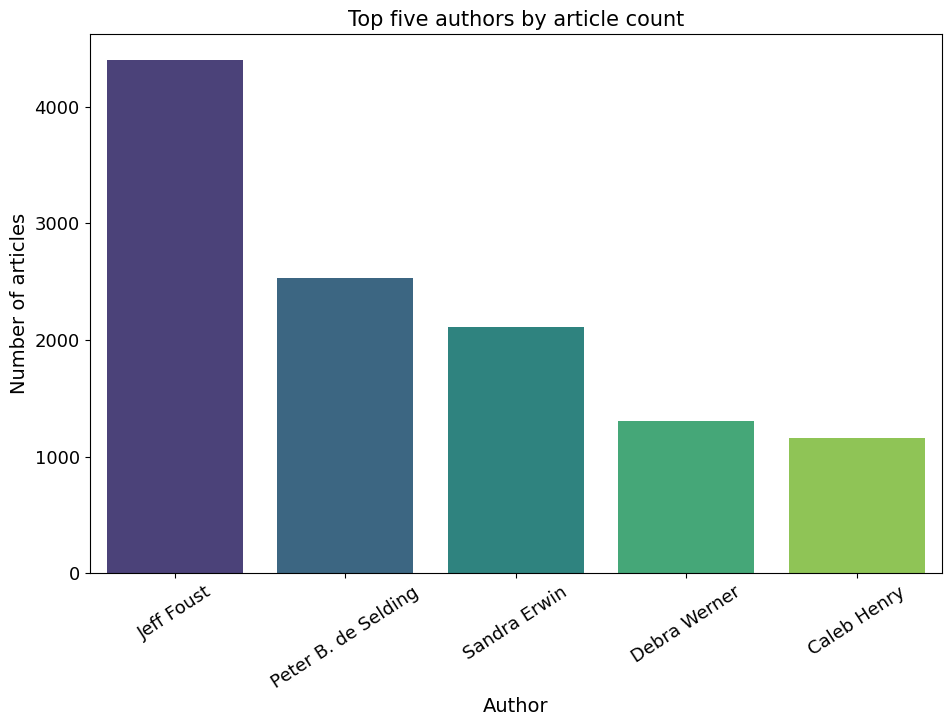

In [20]:
#Visualization of top five authors by the number of articles
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (11, 7))
sns.countplot(x = 'author', data = a, order = a['author'].value_counts()[:5].index, palette = 'viridis')
plt.yticks(size = 13)
plt.xticks(size = 13, rotation = 33)
plt.xlabel('Author', size = 14)
plt.ylabel('Number of articles', size = 14)
plt.title('Top five authors by article count', size = 15)
plt.show()

<ipython-input-21-16fcdb669995>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'date', data = a, order = a['date'].value_counts()[:10].index, palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Futu

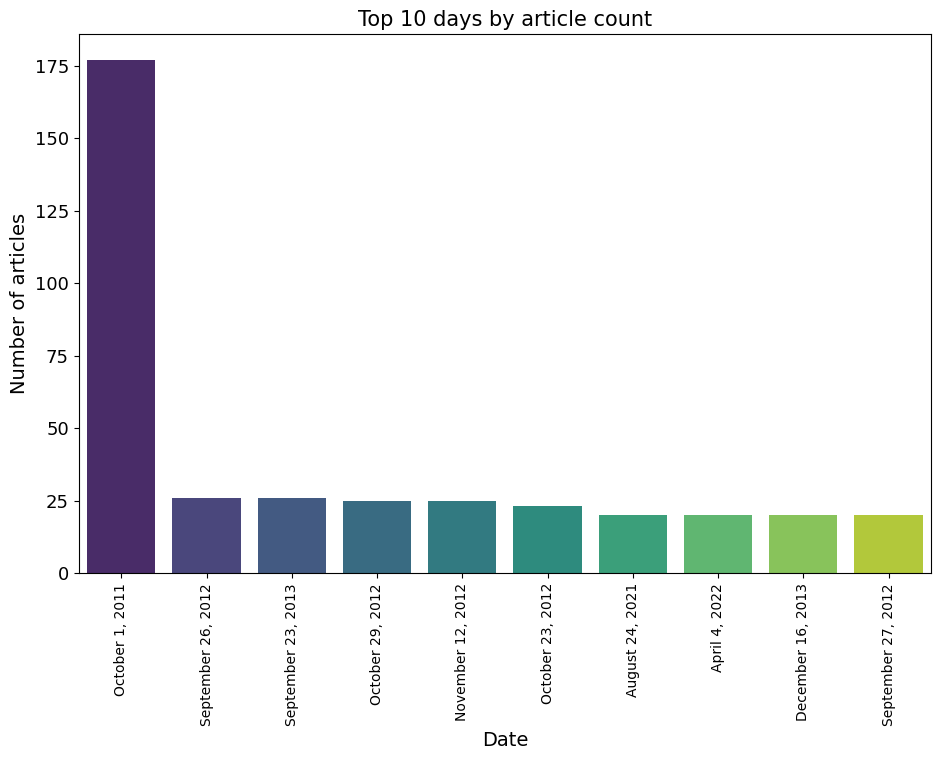

In [21]:
#Visualize the days with the most articles
plt.figure(figsize = (11, 7))
sns.countplot(x = 'date', data = a, order = a['date'].value_counts()[:10].index, palette = 'viridis')
plt.yticks(size = 13)
plt.xticks(size = 10, rotation = 90)
plt.xlabel('Date', size = 14)
plt.ylabel('Number of articles', size = 14)
plt.title('Top 10 days by article count', size = 15)
plt.show()


In [22]:
#print the first ten articles from the day with the most articles published
for i in a[a['date'] == 'October 1, 2011']['title'][:10]:
    print(i)

Shuttle Atlantis Returns from Last Scheduled Mission
Shuttle Retirement Slipping into 2011
NASA Packs Up Robot Helper for International Space Station Trip
NASA Takes Over after Japan Evacuates ISS Control Center [Discovery News]
Latest $1.5B in JWST Cost Overruns Imperils Other High-priority Projects
Satellite Imagery Provides Real-life Mountains for Snowboarding Video Game [Ars Technica]
Japan Clears H-2A Rocket for Sept. 17 Spy Sat Launch
Jody Singer, SLS Deputy Program Manager, NASA Marshall Space Flight Center
Prices Remain Stable in Resurgent Latin American Satellite Market
Falcon 9 Hardware Arrives at the Cape [Florida Today]


In [23]:
#add a new column with the length of the article
a.loc[:,'article_len'] = a['content'].astype(str).apply(lambda x: len(x))

<ipython-input-23-c5d0c6cb0cf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.loc[:,'article_len'] = a['content'].astype(str).apply(lambda x: len(x))


In [24]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18196 entries, 2383 to 20715
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        18196 non-null  object
 1   url          18196 non-null  object
 2   content      18180 non-null  object
 3   author       18196 non-null  object
 4   date         18196 non-null  object
 5   postexcerpt  18196 non-null  object
 6   article_len  18196 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.6+ MB


In [25]:
a.head(10)

,title,url,content,author,date,postexcerpt,article_len
2383,Orion splashes down to end Artemis 1,https://spacenews.com/orion-splashes-down-to-e...,Updated at 5:45 p.m. Eastern after post-splash...,Jeff Foust,"December 11, 2022",Fifty years to the day after the last Apollo m...,5628
2384,Polaris Dawn crewed mission could suffer addit...,https://spacenews.com/polaris-dawn-crewed-miss...,LAS VEGAS — A billionaire-backed private astro...,Jeff Foust,"October 25, 2022",A billionaire-backed private astronaut mission...,3201
2385,DART on track for asteroid collision,https://spacenews.com/dart-on-track-for-astero...,WASHINGTON — A NASA spacecraft is on course to...,Jeff Foust,"September 25, 2022",A NASA spacecraft is on course to deliberately...,5639
2386,U.S. Space Command calls for investment in tec...,https://spacenews.com/u-s-space-command-calls-...,"WASHINGTON — Lt. Gen. John Shaw, deputy comman...",Sandra Erwin,"August 31, 2022",U.S. Space Command's Lt. Gen. John Shaw said '...,4468
2387,SpaceX requests permission for direct-to-smart...,https://spacenews.com/spacex-requests-permissi...,"TAMPA, Fla. — SpaceX could provide “full and c...",Jason Rainbow,"December 8, 2022",SpaceX could provide “full and continuous” dir...,3449
2388,ESA funds Skimsat demonstrator study for VLEO,https://spacenews.com/esa-funds-skimsat-demons...,"TAMPA, Fla. — The European Space Agency has aw...",Jason Rainbow,"July 19, 2022",The European Space Agency has awarded funds to...,2766
2389,Spire to add ThrustMe propulsion to Lemur cube...,https://spacenews.com/spire-thrustme/,SAN FRANCISCO – Spire Global is adding propuls...,Debra Werner,"September 1, 2022",Spire Global is adding propulsion to its multi...,2136
2390,SLS launches Artemis 1 mission,https://spacenews.com/sls-launches-artemis-1-m...,Updated 9:00 a.m. Eastern after post-launch br...,Jeff Foust,"November 16, 2022","After years of delays, NASA’s Space Launch Sys...",5571
2391,Defense Innovation Unit selects contractors to...,https://spacenews.com/defense-innovation-unit-...,WASHINGTON — The Defense Innovation Unit award...,Sandra Erwin,"July 7, 2022","Anduril, Aalyria, Atlas Space and Enveil won c...",3459
2392,Ariane 6 launch debut pushed into 2023,https://spacenews.com/ariane-6-launch-debut-pu...,"TAMPA, Fla. — The maiden flight for Ariane 6 t...",Jason Rainbow,"June 13, 2022",The maiden flight for Ariane 6 that had been s...,2634


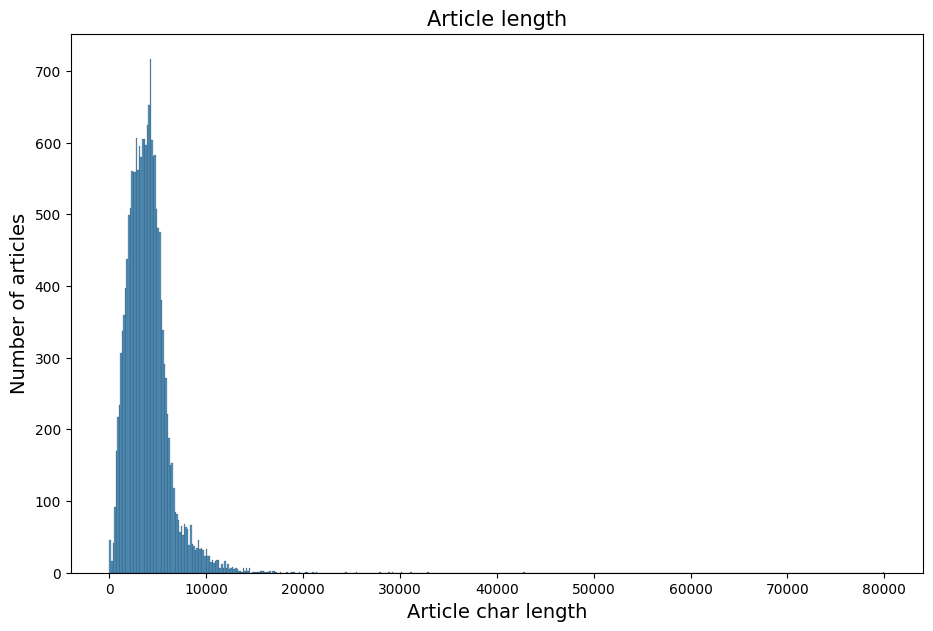

In [26]:
#check if there are some distinct groups of articles based on length like short news and longer research articles
plt.figure(figsize = (11, 7))
sns.histplot(a['article_len'], bins = 500)
plt.xlabel('Article char length', size = 14)
plt.ylabel('Number of articles', size = 14)
plt.title('Article length', size = 15)
plt.show()

In [27]:
#What are the longer articles about?
for i in a[a['article_len'] > 25000].sort_values(by = 'article_len', ascending = False)['title']:
    print(i, a[a['title'] == i]['article_len'].item())

The latest COVID-19 news and event updates for the global space industry 80006
SpaceNews 2015 Year in Review 42818
2011: The Year in Review 32953
2010: The Year in Review 31180
SpaceNews 2014 Year in Review 30121
The SpaceNews Awards 2021: Meet the nine winners 29138
Year Begins, Ends with Future of Human Spaceflight Up in Air 28938
The 2020 SpaceNews Awards winners 27847
2010-2019: The decade in space 25597


In [28]:
#Show every 10th article content for the first 100 entries in dataframe a

for i in range(0, 100, 10):
  print('Article index: {}'.format(i))
  print()
  print(a['content'].iloc[i])
  print('=' * 100)

Article index: 0

Updated at 5:45 p.m. Eastern after post-splashdown briefing. WASHINGTON — Fifty years to the day after the last Apollo moon mission touched down on the lunar surface, NASA’s plans to return to the moon took a major step forward with the successful splashdown of the Orion spacecraft to end the Artemis 1 mission. The Orion spacecraft splashed down off the coast of Baja California at 12:40 p.m. Eastern Dec. 11, ending the 25.5-day Artemis 1 uncrewed test flight. The splashdown took place near recovery forces led by the USS Portland, which will haul the capsule onto the ship to transport back to the port of San Diego, California. “This has been an extraordinarily successful mission,” NASA Administrator Bill Nelson said at a briefing about three hours after splashdown. “It is the beginning of the new beginning, and that is to explore the heavens.” After the European Service Module separated at 12:00 p.m. Eastern, the Orion crew capsule performed a “skip” reentry, descendin

In [29]:
# initializing a new dataframe with only the title column for faster operation

title_df = a['title']
title_df = title_df.to_frame()

title_df.sample(10, random_state = 5)



,title
16623,Poland Tripling Space Spending
7059,ExoMars rover mission delayed to late 2022
11653,SpaceX to reuse Dragon capsules on cargo missions
12417,"France, Germany Admit to Second Thoughts about..."
7314,Study raises prospect of space conflict if U.S...
8385,Senate Intelligence Committee leaders voice su...
10618,AFA Air Space & Cyber Coverage
12780,Thales Alenia Space Awarded CNES Contract for ...
12880,NASA Says No Special Treatment for SpaceX in F...
6101,Space industry rebounds from pandemic


In [30]:
# Exploring the new data frame

nrow, ncol = title_df.shape
print(f'There are {nrow} rows and {ncol} columns.')
# Accessing the first row
print(title_df.iloc[0])

# Accessing a specific cell by row index and column index
print(title_df.iloc[0, 0])

# Iterating through rows and accessing cells
#for index, row in title_df.iterrows():
#  print(f"Row index: {index}, Title: {row['title']}")


There are 18196 rows and 1 columns.
title    Orion splashes down to end Artemis 1
Name: 2383, dtype: object
Orion splashes down to end Artemis 1


<Axes: xlabel='title length', ylabel='No. of articles'>

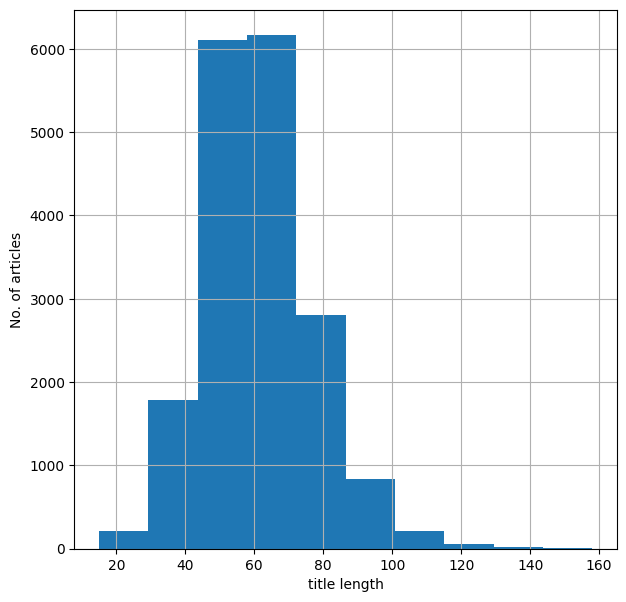

In [31]:
#Visualizing title length

plt.figure(figsize=(7,7))
plt.xlabel("title length")
plt.ylabel("No. of articles")

title_df['title'].str.len().hist()

#Textual Analysis

In [32]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


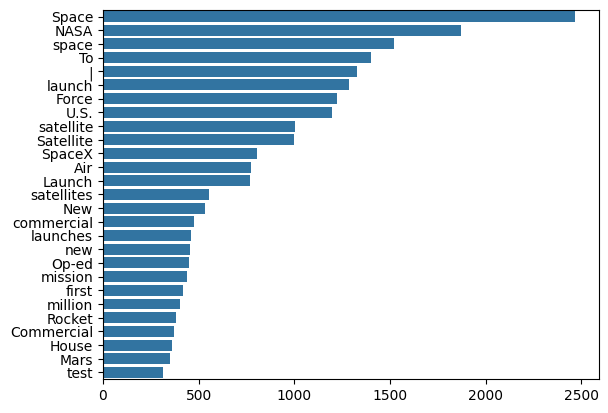

In [33]:
# Code Snippet for Top Non-Stopwords Barchart
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)



plot_top_non_stopwords_barchart(title_df['title'])

In [34]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

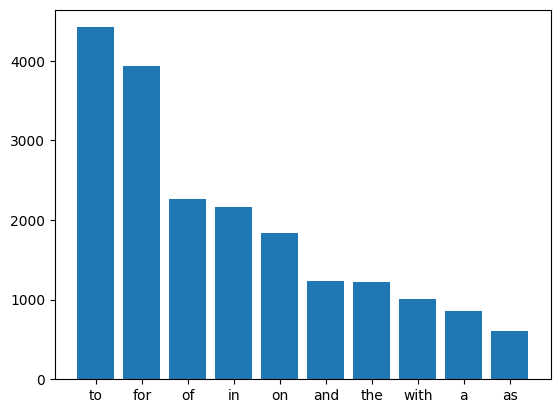

In [35]:
plot_top_stopwords_barchart(title_df['title'])

In [36]:
#stop word removal
stop_words = set(stopwords.words('english'))

stop_words.update(['use'])
# function to remove stopwords
def stop_words_remover(text):
    text_list = text.split(' ')
    text_free = " ".join([i for i in text_list if i.strip() not in stop_words])
    return text_free

# apply the stopword remover
b = title_df.copy()
b['title'] = title_df['title'].apply(stop_words_remover)




In [37]:
#b.info()
#title_df.head(100)
print(title_df['title'].iloc[257])
print(b.title.iloc[257])


China launches 14 satellites with new solid rocket from mobile sea platform
China launches 14 satellites new solid rocket mobile sea platform


In [38]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [39]:
#load the needed libraries
import os
import spacy
from spacy import displacy
#log the English model and pass the object to be used later
nlp_model = spacy.load("en_core_web_sm")

In [40]:
nlp_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ','VERB', 'ADV']):
       output = []
       for sent in texts:
             doc = nlp_model(sent)
             output.append([token.lemma_ for token in doc if token.is_alpha == True if token.pos_ in allowed_postags if token.lemma_ not in stop_words])
       return output

text_list = b['title'].tolist()
tokenized_titles = lemmatization(text_list)

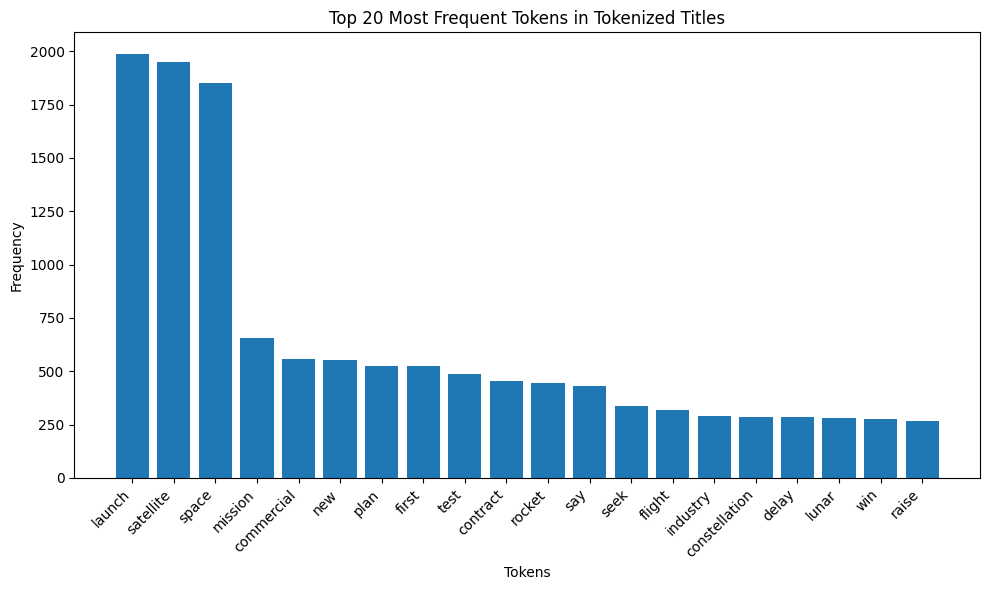

In [41]:
#Visualize tokenized titles

from collections import Counter
import matplotlib.pyplot as plt

all_tokens = [token for sublist in tokenized_titles for token in sublist]

token_counts = Counter(all_tokens)

# get the top N most frequent tokens for instance 20
top_n = 20
most_common_tokens = token_counts.most_common(top_n)

# extract tokens and their counts
tokens, counts = zip(*most_common_tokens)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(tokens, counts)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Tokens in Tokenized Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Plot the n-grams

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

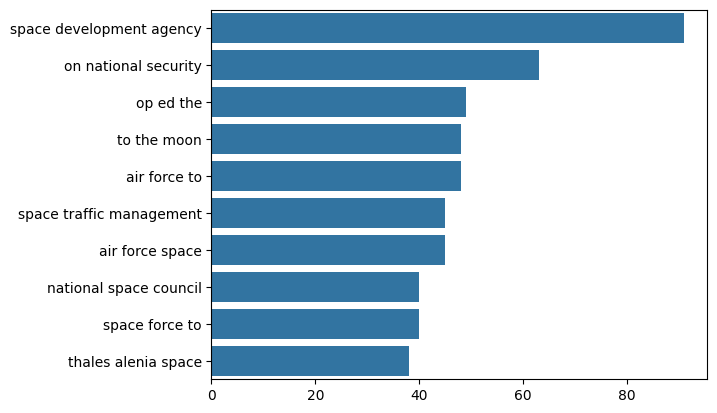

In [43]:
plot_top_ngrams_barchart(title_df['title'],3)

In [44]:
df_spacenews['title'].iloc[3]

'SpaceX sets early June launch of next Starship test flight'

In [45]:

doc_tim= nlp_model(df_spacenews['title'].iloc[3])
displacy.render(doc_tim, style='dep')

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:141: UserWarning: [W005] Doc object not parsed. This means displaCy won't be able to generate a dependency visualization for it. Make sure the Doc was processed with a model that supports dependency parsing, and not just a language class like `English()`. For more info, see the docs:
https://spacy.io/usage/models
  warnings.warn(Warnings.W005)


In [46]:
displacy.render(doc_tim, style='ent')

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [47]:
nlp_model.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f93fcd83760>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f93fcd83ca0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f93fd767880>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f93fc3c14c0>)]

In [48]:
nlp_model.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f93fcd83760>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f93fcd83ca0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f9401ac9620>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x7f93fcd83b80>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f93fd767880>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f93fc3c14c0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f93fced4c10>)]

In [49]:
nlp_model.component_names

['tok2vec',
 'tagger',
 'parser',
 'senter',
 'attribute_ruler',
 'lemmatizer',
 'ner']

#Sentiment analysis


In [50]:
!pip install -U spacytextblob
!python -m textblob.download_corpora

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.5/636.5 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [51]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp_model = spacy.load('en_core_web_sm')
nlp_model.add_pipe("spacytextblob") # Add the SpacyTextBlob component to the pipeline

newtext = "We’ve got to get it right, because if we do get it wrong, this timeline gets reset in a big way."
doc_new = nlp_model(newtext)
print(doc_new._.polarity)
print(doc_new._.subjectivity)
print(doc_new._.assessments)

-0.07142857142857144
0.511904761904762
[(['right'], 0.2857142857142857, 0.5357142857142857, None), (['wrong'], -0.5, 0.9, None), (['big'], 0.0, 0.1, None)]


#References

https://pypi.org/project/textblob/

https://neptune.ai/blogexploratory-data-analysis-natural-language-processing-tools

https://www.kaggle.com/datasets/patrickfleith/space-news-dataset/data

https://www.nltk.org/howto.html

https://www.nltk.org/book/ch08.html

https://spacy.io/usage/
